# The WineDataset Project

Lets start the project by inputing some libraries first 

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore  
warnings.filterwarnings('ignore')

Now, we are gonna gonna load the dataset from the csv file

In [291]:
wine=pd.read_csv('winedataset.csv')
wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


First, lets make some copy of this data becasue if it that changes accidently it wont hurt the main file

In [292]:
wine_test1=wine.copy()
wine_test2=wine.copy()

In [293]:
wine_test1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Here, now we have the copy data. now we can work and test on it as we through



So, first what we are gonna do is to check some null value if theres any present in the current data set

In [294]:
wine_test2.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


Hmm, lets make a some of all the NaN values in rows so we can see the number of values persent in any rows 

In [295]:
wine_test2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see, in every rows there are zero null values presentin the current dataset

# Data Analysis

Now, lets start by looking at the data by visualizing and finding out the outliers of each columns to help to get the better understanding, also to check the corerelation between each rows and columns of the data

In [296]:
wine_test2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [297]:
wine_test2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


What we got from this data is that only 3 columns that has some abnormal values which is not even related to the min and mean values so these are the outliers that is present in the current dataset

which are,

          1.residual sugar
          2.free sulfur dioxide
          3.total sulfur dioxide




Lets quickly check out the corerelation between them 

In [298]:
wine_test_core=wine_test1.corr()
wine_test_core

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


now, lets generate a heatmap to get better understading of this corerelation data by visualizing it

<AxesSubplot:>

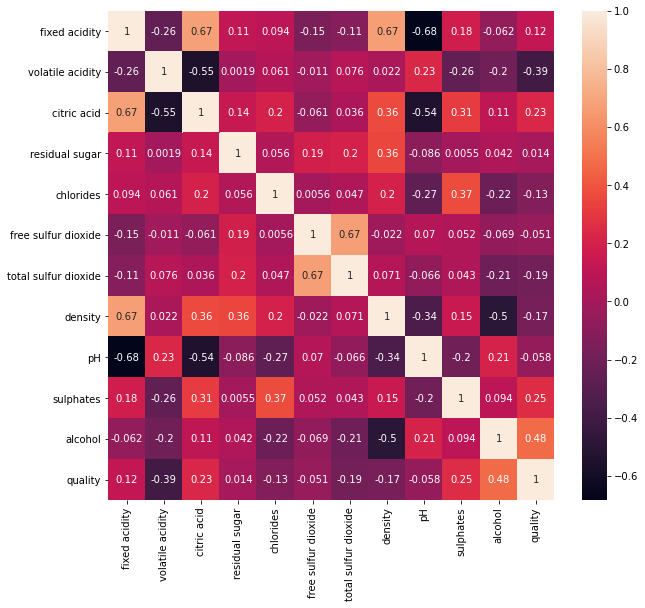

In [299]:
plt.figure(figsize=(10,9))

sns.heatmap(wine_test_core, annot=True)

There are 6 numbers of data which are lightcores and are highly corerelated 

Which ae free sulfer dioxide and total sulfer dioxide are highly corerelated

fixed acidity and density are highly corerelated

And lastly fixed acidity and critic acid are alos highly corerealted

since the volitile acid and the ph is giving us the negative corerelation values with each columns we can drop this two columns 

In [300]:
wine_test2.drop('pH', axis=1)
wine_test2.drop('volatile acidity',axis=1, inplace=True)

In [301]:
wine_test2.drop('pH',axis=1,inplace=True)

In [302]:
wine_test2

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


# Outlirs testing and Fixing 

First we will draw a box plot with the help of subplot to genereate all the columns in a one set so we can see and compare with 

As we know from the previous analysis, in the described method we found out there are three columns which has abnormal max values in compre to the mode of the total column 

So, lets draw some box plots of those three columns to see how much outliers are present will be in any effect if we remove it form the dataset


<AxesSubplot:xlabel='residual sugar'>

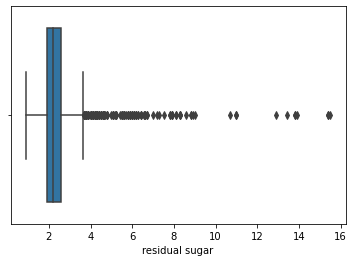

In [303]:
sns.boxplot(x=wine_test2['residual sugar'])

<AxesSubplot:xlabel='free sulfur dioxide'>

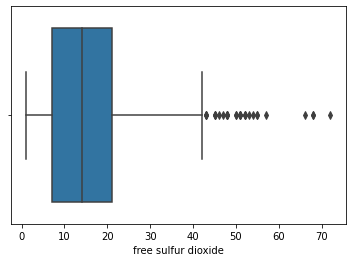

In [304]:
sns.boxplot(x=wine_test2['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

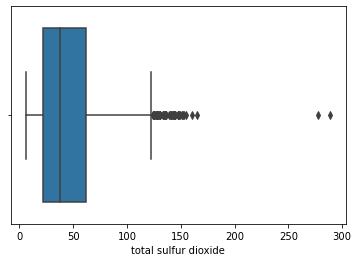

In [305]:
sns.boxplot(x=wine_test2['total sulfur dioxide']) 

soo, as we can see, i dont think removing all the outliers from "residual sugar", "free sulfur dioxide" will do any good casue by removing all the ouliers may losing the date over 20-30% but in "total sulfur dioxide"  there we can see there are two values in the graph which lies far far away from the remaning outliers this can be removed from this column

In [307]:
wine_test3=wine_test2.copy()

In [308]:
wine_test3

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


In [311]:
wine_test3.shape

(1599, 10)

In [309]:
values_over_250=wine_test3[wine_test3['total sulfur dioxide']>=250]

In [310]:
values_over_250

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
1079,7.9,0.68,8.3,0.05,37.5,278.0,0.99316,0.51,12.3,7
1081,7.9,0.68,8.3,0.05,37.5,289.0,0.99316,0.51,12.3,7


In [319]:
x=wine_test3.drop([1079,1081],axis=0)

In [320]:
x.shape

(1597, 10)

In [321]:
values_over_250=x[x['total sulfur dioxide']>=250]
values_over_250

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality


as we can see theere are no such values present in the coulmn anymore, lets make it in replace

Similarly, we will do the same process with rest of the 2 by slecting closer values from the highest value of the column of the dataset

In [335]:
values_over_13=wine_test3[wine_test3['residual sugar']>=14]
values_over_13

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
480,10.6,0.39,15.5,0.069,6.0,23.0,1.00260,0.66,9.2,5
1434,10.2,0.37,15.4,0.214,55.0,95.0,1.00369,0.77,9.0,6
1435,10.2,0.37,15.4,0.214,55.0,95.0,1.00369,0.77,9.0,6


In [337]:
x2=wine_test3.drop([480,1434,1435,],axis=0)
x2
x2.shape

(1594, 10)

In [338]:
values_over_65=wine_test3[wine_test3['free sulfur dioxide']>=67]
values_over_65

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
396,6.6,0.02,7.9,0.122,68.0,124.0,0.99940,0.53,9.9,5
400,6.6,0.02,7.9,0.122,68.0,124.0,0.99940,0.53,9.9,5
1244,5.9,0.25,13.4,0.067,72.0,160.0,0.99721,0.54,10.3,6


In [341]:
x3=wine_test3.drop([396,400,1244,],axis=0)
print(x3)
x3.shape

      fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00             1.9      0.076   
1               7.8         0.00             2.6      0.098   
2               7.8         0.04             2.3      0.092   
3              11.2         0.56             1.9      0.075   
4               7.4         0.00             1.9      0.076   
...             ...          ...             ...        ...   
1594            6.2         0.08             2.0      0.090   
1595            5.9         0.10             2.2      0.062   
1596            6.3         0.13             2.3      0.076   
1597            5.9         0.12             2.0      0.075   
1598            6.0         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                    11.0                  34.0  0.99780       0.56      9.4   
1                    25.0                  67.0  0.99680       0.68      9.8   
2  

(1594, 10)

In [355]:
wine_test2

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


In [357]:
wine_test2.drop([1079,1081,480,1434,1435,396,400,1244],axis=0, inplace=True)
wine_test2

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


In [358]:
wine_test2.shape

(1591, 10)

In [361]:
percentage_loss=(1591/1599)*100
int(percentage_loss)

99

#  Model Selection



Train test split

In [362]:
wine_test2

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


In [364]:
wine_test2.drop('quality', axis=1).head(12)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4
5,7.4,0.00,1.8,0.075,13.0,40.0,0.9978,0.56,9.4
6,7.9,0.06,1.6,0.069,15.0,59.0,0.9964,0.46,9.4
7,7.3,0.00,1.2,0.065,15.0,21.0,0.9946,0.47,10.0
8,7.8,0.02,2.0,0.073,9.0,18.0,0.9968,0.57,9.5
9,7.5,0.36,6.1,0.071,17.0,102.0,0.9978,0.80,10.5


In [365]:
wine_test2['quality'].head(12)

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
Name: quality, dtype: int64

In [395]:
x_train,x_test,y_train,y_test = train_test_split(wine_test2.drop('quality', axis=1),wine_test2['quality'],
                                                test_size=0.25,random_state=101)

In [396]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()

In [397]:
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)

In [398]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)

In [399]:
accuracy

array([[  0,   0,   1,   3,   1,   0],
       [  0,   1,   8,   5,   0,   0],
       [  0,   0, 110,  67,   5,   0],
       [  0,   1,  46,  91,   7,   0],
       [  0,   0,   3,  45,   0,   0],
       [  0,   0,   0,   4,   0,   0]], dtype=int64)

In [400]:
predictions

array([5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6, 7, 5, 6, 5,
       6, 6, 6, 6, 7, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 5, 6, 5, 6, 4, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 4, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6,